**Build a Multiclass classifier using the CNN model. Use MNIST or any other suitable dataset. a.
Perform Data Pre-processing b. Define Model and perform training c. Evaluate Results using confusion
matrix.**

In [3]:
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [5]:
# Normalize pixel values to be between 0 and 1
x_train= x_train / 255.0
x_test = x_test / 255.0

In [6]:
# Reshape the images to be 28x28x1 (for grayscale)
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

In [7]:
# Convert labels to one-hot encoding
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

In [8]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')  # Output layer for 10 classes
])

C:\Users\HP\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [10]:
history = model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 29s 14ms/step - accuracy: 0.8973 - loss: 0.3392 - val_accuracy: 0.9848 - val_loss: 0.0463
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 26s 14ms/step - accuracy: 0.9836 - loss: 0.0528 - val_accuracy: 0.9853 - val_loss: 0.0431
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 26s 14ms/step - accuracy: 0.9890 - loss: 0.0343 - val_accuracy: 0.9902 - val_loss: 0.0315
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 25s 13ms/step - accuracy: 0.9926 - loss: 0.0255 - val_accuracy: 0.9906 - val_loss: 0.0294
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 25s 13ms/step - accuracy: 0.9946 - loss: 0.0177 - val_accuracy: 0.9838 - val_loss: 0.0524


In [11]:
# Predict the labels for the test set
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


In [12]:
# Compute the confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)

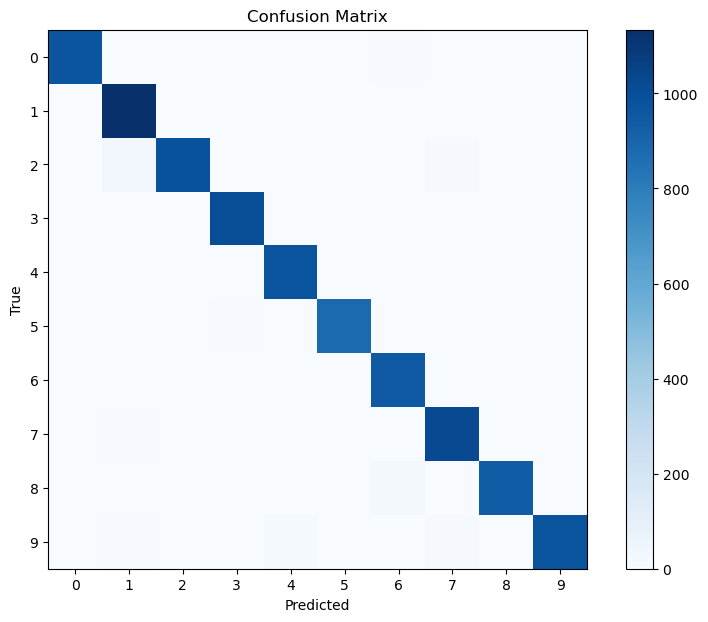

In [13]:
# Plot confusion matrix
plt.figure(figsize=(10, 7))
plt.imshow(cm, cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.colorbar()
plt.xticks(np.arange(10), np.arange(10))
plt.yticks(np.arange(10), np.arange(10))
plt.show()

In [14]:
# Print accuracy
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"Test Accuracy: {test_acc*100 :0.2f}%")

313/313 - 2s - 5ms/step - accuracy: 0.9838 - loss: 0.0524
Test Accuracy: 98.38%


In [15]:
# Print confusion matrix
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[ 971    1    0    0    1    0    6    1    0    0]
 [   0 1134    0    1    0    0    0    0    0    0]
 [   2   28  985    0    1    0    4   11    1    0]
 [   0    1    0 1004    0    1    0    3    1    0]
 [   0    2    0    0  975    0    3    0    1    1]
 [   1    0    0    6    0  879    4    1    0    1]
 [   1    2    0    0    1    1  953    0    0    0]
 [   0    5    0    0    0    0    0 1022    0    1]
 [   2    3    1    0    2    0   22    2  939    3]
 [   0    5    0    1   14    1    0   10    2  976]]
